In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


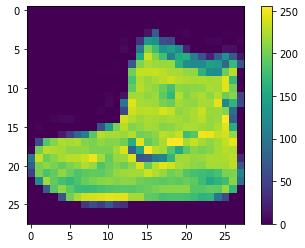

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.grid(False)
plt.colorbar()
plt.show()

In [5]:
y_train[0]

9

In [6]:
labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandals", "Shirt", 
         "Sneakers", "Bag", "Ankle Boots"]

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

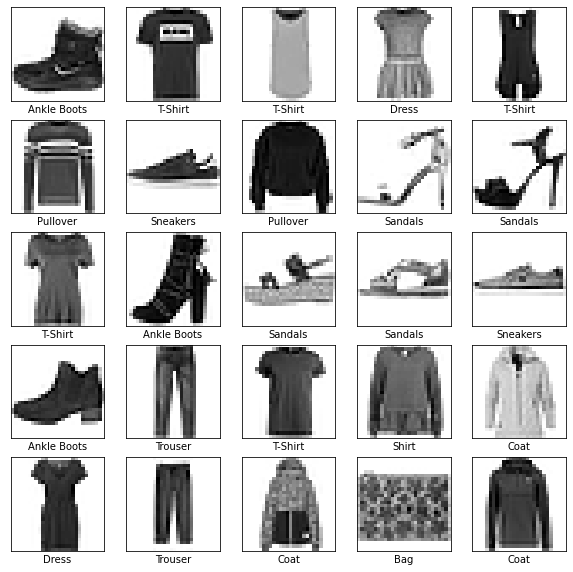

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
   1/1875 [..............................] - ETA: 6:21 - loss: 2.3711 - accuracy: 0.0938

C:\Users\ASUS\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 1s 648us/step - loss: 0.4936 - accuracy: 0.8246 - val_loss: 0.4035 - val_accuracy: 0.8539
Epoch 2/5
1875/1875 [==============================] - 1s 579us/step - loss: 0.3678 - accuracy: 0.8660 - val_loss: 0.3914 - val_accuracy: 0.8601
Epoch 3/5
1875/1875 [==============================] - 1s 581us/step - loss: 0.3314 - accuracy: 0.8789 - val_loss: 0.3692 - val_accuracy: 0.8682
Epoch 4/5
1875/1875 [==============================] - 1s 576us/step - loss: 0.3064 - accuracy: 0.8875 - val_loss: 0.3586 - val_accuracy: 0.8676
Epoch 5/5
1875/1875 [==============================] - 1s 581us/step - loss: 0.2916 - accuracy: 0.8909 - val_loss: 0.3626 - val_accuracy: 0.8691


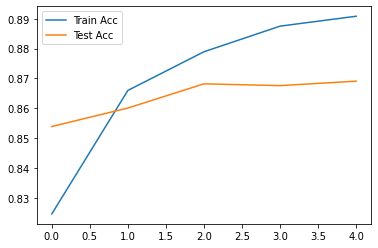

In [15]:
plt.plot(model.history.history['accuracy'], label='Train Acc')
plt.plot(model.history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.show()

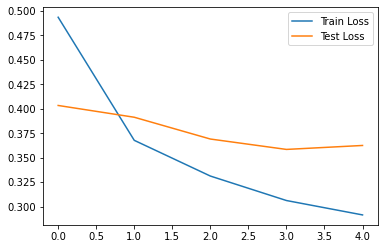

In [16]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

In [19]:
import numpy as np

In [22]:
x_test.shape

(10000, 28, 28)

In [25]:
np.argmax(model.predict(x_test[100].reshape(1,28,28)))

3

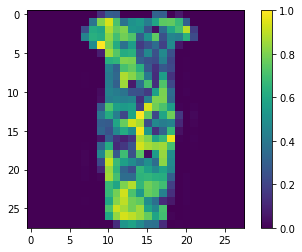

In [27]:
plt.figure()
plt.imshow(x_test[100])
plt.grid(False)
plt.colorbar()
plt.show()